Deutsche Josza Algorithm 
it is the generalization of Deutsche problem for an input  the task is to get an output 0 if it is constant and 1 the f is balanced
the condition is when n>=2 the function  are neither constant nor balanced 
in simple this algorithm states any task to constant if its 0 else 1 which is balanced state


In [44]:
import numpy as np
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit ,QuantumRegister,transpile
from qiskit.visualization import plot_histogram
import random

In [45]:
import random
def deutsch_josza(qc, qubits, func_type):
    n = len(qubits) - 1  # number of input qubits (excluding target/output qubit)

    if func_type == "constant_0":
        # f(x) = 0 for all inputs and does nothing to the circuit
        pass
    elif func_type == "constant_1":
        # f(x) = 1 for all inputs (X gate on the target qubit)
        qc.x(qubits[-1])
    elif func_type == "balanced":
        # A balanced function will have equal 0s and 1s in its output
        for i in range(n):
            if random.choice([True, False]):
                qc.cx(qubits[i], qubits[-1])  # CNOT gates flip the target based on input qubits
    else:
        raise ValueError("Unknown function type. Must be one of 'constant_0', 'constant_1', 'balanced'.")


In [46]:
def deutsch_josza_circuit(n,func_type):
    qc=QuantumCircuit(n+1,n)
    # Initialize the target qubit in the |1> state and apply Hadamard to all qubits
    qc.x(n)  # Set the target qubit to |1>
    qc.h(range(n+1))  # Apply Hadamard to all qubits

    # Apply the oracle/function (query gate)
    deutsch_josza(qc, range(n+1), func_type)

    # Apply Hadamard to the input qubits again
    qc.h(range(n))

    # Measure the input qubits
    qc.measure(range(n), range(n))

    return qc


In [47]:
def draw_deutsch_josza_circuit(qc,func_type):
    display(qc.draw("mpl"))

In [48]:
from qiskit import transpile
import matplotlib.pyplot as plt

def run(n,func_type):
    """Run the Deutsch-Josza algorithm."""
    qc = deutsch_josza_circuit(n,func_type)
    simulator = AerSimulator()
    transpiled_qc =transpile(qc,simulator)  # Transpile for the backend
    result = simulator.run(transpiled_qc).result()
    measurements = result.get_counts(qc)

    
    # Analyze result
    print("\nMeasurement Result:", measurements)
    
    # Determine if the function is balanced or constant
    if '0' * n in measurements:
        print("The function is CONSTANT")
    else:
        print("The function is BALANCED")

   


    draw_deutsch_josza_circuit(qc, func_type)
    

    


Measurement Result: {'100': 1024}
The function is BALANCED


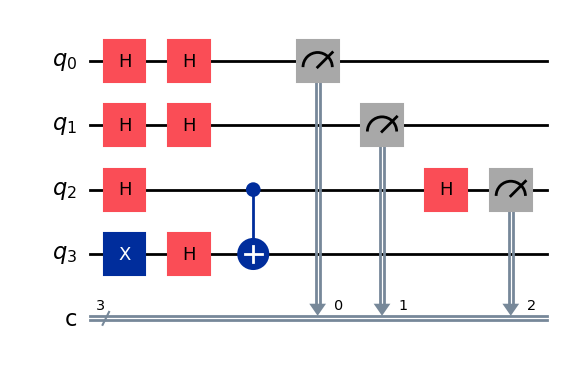

In [49]:
n=3
func_type = random.choice(["constant_0", "constant_1", "balanced"])
result=run(n, func_type)


The function is constant.

Deutsch-Jozsa circuit:


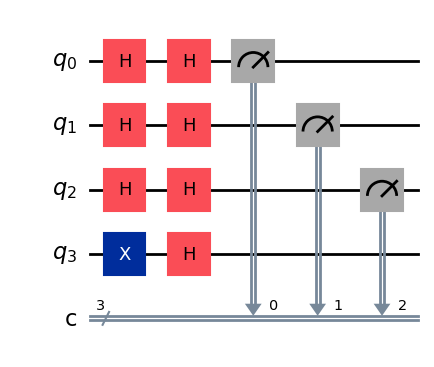


Simulation results:
{'000': 1024}


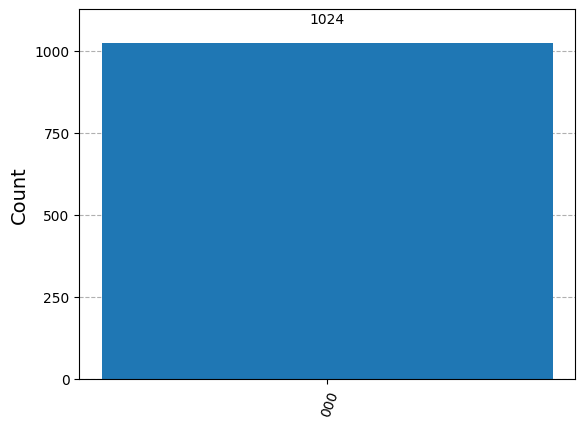

In [50]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator  # Updated import
from qiskit.visualization import plot_histogram
import random

# Query gate implementation for a given f(x)
def create_query_gate(n_qubits, function):
    """
    Creates the quantum circuit for the query gate U_f.
    
    Args:
    - n_qubits (int): Number of input qubits
    - function (callable): A Boolean function f(x) that returns 0 or 1
    
    Returns:
    - QuantumCircuit: Circuit implementing U_f
    """
    qc = QuantumCircuit(n_qubits + 1)
    
    for x in range(2**n_qubits):
        binary_x = f"{x:0{n_qubits}b}"
        if function(binary_x) == 1:
            # Apply X gate to the auxiliary qubit for f(x)=1
            for i, bit in enumerate(reversed(binary_x)):
                if bit == '0':
                    qc.x(i)
            qc.mcx(list(range(n_qubits)), n_qubits)  # Apply multi-controlled X
            for i, bit in enumerate(reversed(binary_x)):
                if bit == '0':
                    qc.x(i)
    
    return qc

# Deutsch-Jozsa circuit
def deutsch_jozsa_circuit(query_gate, n_qubits):
    """
    Creates the Deutsch-Jozsa circuit.
    
    Args:
    - query_gate (QuantumCircuit): Quantum query gate U_f
    - n_qubits (int): Number of input qubits
    
    Returns:
    - QuantumCircuit: Full Deutsch-Jozsa circuit
    """
    qc = QuantumCircuit(n_qubits + 1, n_qubits)
    
    # Apply H gates to input qubits and initialize |-> on the auxiliary qubit
    qc.h(range(n_qubits))
    qc.x(n_qubits)
    qc.h(n_qubits)
    
    # Add the query gate
    qc.compose(query_gate, inplace=True)
    
    # Apply H gates to input qubits again
    qc.h(range(n_qubits))
    
    # Measure the input qubits
    qc.measure(range(n_qubits), range(n_qubits))
    
    return qc

# Random function generator
def random_function(n_qubits):
    """
    Generates a random constant or balanced function.
    
    Args:
    - n_qubits (int): Number of input qubits
    
    Returns:
    - function: A callable Boolean function f(x)
    - str: "constant" or "balanced"
    """
    is_constant = random.choice([True, False])
    if is_constant:
        value = random.choice([0, 1])
        return lambda x: value, "constant"
    else:
        half_size = 2**(n_qubits - 1)
        balanced_set = set(random.sample(range(2**n_qubits), half_size))
        return lambda x: 1 if int(x, 2) in balanced_set else 0, "balanced"

# Test the Deutsch-Jozsa algorithm
n_qubits = 3
function, func_type = random_function(n_qubits)
query_gate = create_query_gate(n_qubits, function)
dj_circuit = deutsch_jozsa_circuit(query_gate, n_qubits)

print(f"The function is {func_type}.")
print("\nDeutsch-Jozsa circuit:")
display(dj_circuit.draw("mpl"))

# Simulate the circuit using AerSimulator
simulator = AerSimulator()  # Updated to use AerSimulator

results = simulator.run(dj_circuit, shots=1024).result()  # Run directly without execute
counts = results.get_counts()

# Display results
print("\nSimulation results:")
print(counts)
plot_histogram(counts)


In [51]:
print(dj_circuit)

     ┌───┐┌───┐┌─┐      
q_0: ┤ H ├┤ H ├┤M├──────
     ├───┤├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ H ├─╫─┤M├───
     ├───┤├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─╫──╫─┤M├
     ├───┤├───┤ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─╫──╫──╫─
     └───┘└───┘ ║  ║  ║ 
c: 3/═══════════╩══╩══╩═
                0  1  2 
